# Importing the needed libraries

In [ ]:
!pip install chardet
!pip install dask[complete]
!pip install memory_profiler

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import dask.dataframe as dd
import time
import memory_profiler

# Loading the dataset

In [3]:
file_path = "F:/ITI Data Egineering/Liberaries/final project/globalterrorismdb_0718dist.csv"

with open(file_path, 'rb') as file:
    raw_data = file.read(100000)  

result = chardet.detect(raw_data)
encoding = result['encoding']
encoding

'ISO-8859-1'

In [5]:
df = pd.read_csv("F:/ITI Data Egineering/Liberaries/final project/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\594231475.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("F:/ITI Data Egineering/Liberaries/final project/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")


# Data Acquisition and Preprocessing

In [7]:
df.shape

(181691, 135)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
pd.set_option('display.max_columns', None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [13]:
pd.set_option('display.max_rows', None)
df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

## Check for duplicate values

In [15]:
df[df.duplicated()]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


#### Result: No duplicate values

## Check for null values

In [17]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     435
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [19]:
pd.set_option('display.max_columns', None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

#### Handling null values

In [21]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values, index = None, columns = ["Null Count"])

In [23]:
# create dataframe with columns with their nulls 
null_values.reset_index(inplace=True)
null_values = null_values.rename(columns = { 'index':'variable'})
null_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   variable    135 non-null    object
 1   Null Count  135 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [25]:
# calculate percentage missing and percentage complete
null_values["Percentage_Missing"] = null_values["Null Count"] / (len(df))
null_values["Percentage_Complete"] = 1 - null_values["Percentage_Missing"]

In [27]:
# attributes with a completeness above 95%
perc_complete = 0.90
selected_attributes = null_values[null_values["Percentage_Complete"] >= perc_complete]
selected_attributes

,variable,Null Count,Percentage_Missing,Percentage_Complete
0,eventid,0,0.000000,1.000000
1,iyear,0,0.000000,1.000000
2,imonth,0,0.000000,1.000000
3,iday,0,0.000000,1.000000
5,extended,0,0.000000,1.000000
7,country,0,0.000000,1.000000
8,country_txt,0,0.000000,1.000000
9,region,0,0.000000,1.000000
10,region_txt,0,0.000000,1.000000
11,provstate,421,0.002317,0.997683


In [29]:
# extract the desired columns
cols = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude',
        'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'gname',
        'individual', 'weaptype1_txt', 'nkill', 'nwound', 'ishostkid', 'property', 'doubtterr',
        'provstate', 'dbsource', 'INT_LOG', 'INT_IDEO','natlty1_txt']

In [31]:
df_cleaned = pd.DataFrame(data = df, columns = cols)
df_cleaned.head()

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,gname,individual,weaptype1_txt,nkill,nwound,ishostkid,property,doubtterr,provstate,dbsource,INT_LOG,INT_IDEO,natlty1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,0,Unknown,1.0,0.0,0.0,0,0.0,NaN,PGIS,0,0,Dominican Republic
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,Unknown,0.0,0.0,1.0,0,0.0,Federal,PGIS,0,1,Belgium
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,0,Unknown,1.0,0.0,0.0,0,0.0,Tarlac,PGIS,-9,-9,United States
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,0,Explosives,NaN,NaN,0.0,1,0.0,Attica,PGIS,-9,-9,United States
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,0,Incendiary,NaN,NaN,0.0,1,-9.0,Fukouka,PGIS,-9,-9,United States


In [33]:
df_cleaned.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
city                 435
latitude            4556
longitude           4557
success                0
suicide                0
attacktype1_txt        0
targtype1_txt          0
gname                  0
individual             0
weaptype1_txt          0
nkill              10313
nwound             16311
ishostkid            178
property               0
doubtterr              1
provstate            421
dbsource               0
INT_LOG                0
INT_IDEO               0
natlty1_txt         1559
dtype: int64

#### Drop null row

In [41]:
columns_to_drop = [
    'city', 'latitude', 'longitude', 'nkill', 'nwound', 'ishostkid', 'provstate', 
    'doubtterr', 'natlty1_txt'
]

df_cleaned = df_cleaned.dropna(subset=columns_to_drop)

## Renaming the columns

In [46]:
df_cleaned.rename(columns= {'iyear':'year', 'imonth':'month',
                          'iday':'day', 'country_txt':'country',
                          'region_txt':'region', 'attacktype1_txt':'attack_type',
                          'targtype1_txt':'target_type','gname':'group_name',
                          'weaptype1_txt':'weapon_type', 'nkill':'killed',
                          'nwound':'wounded','ishostkid':'is_kidnapped',
                          'doubtterr':'is_terrorism','provstate':'state',
                          'dbsource':'source','INT_LOG':'is_international',
                          'INT_IDEO':'is_ideological','natlty1_txt':'nationality'}, inplace = True)

df_cleaned.head()

,year,month,day,country,region,city,latitude,longitude,success,suicide,attack_type,target_type,group_name,individual,weapon_type,killed,wounded,is_kidnapped,property,is_terrorism,state,source,is_international,is_ideological,nationality
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,Unknown,0.0,0.0,1.0,0,0.0,Federal,PGIS,0,1,Belgium
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,0,Unknown,1.0,0.0,0.0,0,0.0,Tarlac,PGIS,-9,-9,United States
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,1,0,Armed Assault,Police,Black Nationalists,0,Firearms,0.0,0.0,0.0,1,0.0,Illinois,Hewitt Project,-9,-9,United States
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,0,0,Assassination,Police,Tupamaros (Uruguay),0,Firearms,0.0,0.0,0.0,0,0.0,Montevideo,PGIS,0,0,Uruguay
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,1,0,Bombing/Explosion,Utilities,Unknown,0,Explosives,0.0,0.0,0.0,1,1.0,California,Hewitt Project,-9,-9,United States


In [96]:
df_cleaned.isnull().sum()

year                    0
month                   0
day                     0
country                 0
region                  0
city                    0
latitude                0
longitude               0
success                 0
suicide                 0
attack_type             0
target_type             0
group_name              0
individual              0
weapon_type             0
killed                  0
wounded                 0
is_kidnapped          192
property            18888
is_terrorism        11599
state                   0
source                  0
is_international    83879
is_ideological      83879
nationality             0
dtype: int64

In [100]:
columns_to_drop = [
    'is_kidnapped', 'property', 'is_terrorism', 'is_international', 'is_ideological' 
]

df_cleaned = df_cleaned.dropna(subset=columns_to_drop)

In [102]:
df_cleaned.isnull().sum()

year                0
month               0
day                 0
country             0
region              0
city                0
latitude            0
longitude           0
success             0
suicide             0
attack_type         0
target_type         0
group_name          0
individual          0
weapon_type         0
killed              0
wounded             0
is_kidnapped        0
property            0
is_terrorism        0
state               0
source              0
is_international    0
is_ideological      0
nationality         0
dtype: int64

In [104]:
df_cleaned.shape

(65789, 25)

#### Result: the dataset after drop nulls has 25 columns with 65789 rows

## Dataframe for nationality

In [48]:
# check for Unknown values
df_cleaned['nationality'].value_counts().get('Unknown', 0)

0

In [50]:
nationality_type = df_cleaned['nationality'].value_counts().reset_index()
nationality_type

,nationality,count
0,Iraq,22746
1,Pakistan,13369
2,India,11460
3,Afghanistan,10056
4,Colombia,6947
5,Philippines,6033
6,Peru,4884
7,United States,4509
8,Turkey,4279
9,Israel,3614


In [52]:
df_cleaned.columns


Index(['year', 'month', 'day', 'country', 'region', 'city', 'latitude',
       'longitude', 'success', 'suicide', 'attack_type', 'target_type',
       'group_name', 'individual', 'weapon_type', 'killed', 'wounded',
       'is_kidnapped', 'property', 'is_terrorism', 'state', 'source',
       'is_international', 'is_ideological', 'nationality'],
      dtype='object')

In [54]:
df_cleaned['property'].unique()

array([ 0,  1, -9], dtype=int64)

In [56]:
# Replace -9 with NaN
df_cleaned['property'].replace(-9, np.nan, inplace=True)

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\1141227981.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['property'].replace(-9, np.nan, inplace=True)


In [58]:
df_cleaned['property'].unique()

array([ 0.,  1., nan])

In [60]:
np.set_printoptions(suppress=True)#display these values as normal numbers
df_cleaned['wounded'].unique()

array([   0. ,    1. ,    2. ,    7. ,    9. ,   17. ,    5. ,    3. ,
         10. ,   12. ,   20. ,    4. ,   11. ,   27. ,   13. ,   19. ,
        130. ,   56. ,   24. ,    6. ,   72. ,  238. ,   55. ,   15. ,
          8. ,   18. ,   50. ,   34. ,   14. ,   70. ,  102. ,   41. ,
         48. ,   25. ,   81. ,   54. ,   53. ,  100. ,   45. ,   33. ,
         40. ,   62. ,   74. ,   22. ,   31. ,   16. ,   30. ,  285. ,
         23. ,   42. ,   36. ,   43. ,   76. ,   44. ,   52. ,   46. ,
         49. ,  160. ,   37. ,   21. ,   60. ,   26. ,   28. ,   39. ,
         38. ,   35. ,   32. ,   78. ,   80. ,   47. ,  188. ,  215. ,
         85. ,   75. ,  161. ,   90. ,  300. ,   95. ,  135. ,   61. ,
        138. ,   71. ,  700. ,   66. ,  136. ,  120. ,  217. ,  319. ,
        133. ,   68. ,   73. ,   29. ,  751. ,  200. ,  112. ,  250. ,
         82. ,  132. ,  230. ,  107. ,  114. ,   84. ,  140. ,  150. ,
         51. ,   58. ,   64. ,  295. ,  106. ,  125. ,   69. ,   59. ,
      

In [62]:
df_cleaned['is_ideological'].unique()

array([ 1, -9,  0], dtype=int64)

In [64]:
# Replace -9 with NaN
df_cleaned['is_ideological'].replace(-9, np.nan, inplace=True)

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\2740475100.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['is_ideological'].replace(-9, np.nan, inplace=True)


In [66]:
df_cleaned['is_ideological'].unique()

array([ 1., nan,  0.])

In [68]:
df_cleaned['is_international'].unique()

array([ 0, -9,  1], dtype=int64)

In [70]:
# Replace -9 with NaN
df_cleaned['is_international'].replace(-9, np.nan, inplace=True)

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\3052639665.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['is_international'].replace(-9, np.nan, inplace=True)


In [72]:
df_cleaned['is_international'].unique()

array([ 0., nan,  1.])

In [74]:
df_cleaned['is_kidnapped'].unique()

array([ 1.,  0., -9.])

In [76]:
# Replace -9 with NaN
df_cleaned['is_kidnapped'].replace(-9, np.nan, inplace=True)

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\202304076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['is_kidnapped'].replace(-9, np.nan, inplace=True)


In [78]:
df_cleaned['is_kidnapped'].unique()

array([ 1.,  0., nan])

In [80]:
df_cleaned['is_terrorism'].unique()

array([ 0.,  1., -9.])

In [82]:
# Replace -9 with NaN
df_cleaned['is_terrorism'].replace(-9, np.nan, inplace=True)

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\3378853525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['is_terrorism'].replace(-9, np.nan, inplace=True)


In [84]:
df_cleaned['is_terrorism'].unique()

array([ 0.,  1., nan])

In [86]:
np.set_printoptions(suppress=True) #display these values as normal numbers
df_cleaned['killed'].unique()

array([   0.,    1.,    7.,   47.,    2.,    3.,    4.,   26.,   81.,
          8.,    5.,   30.,   12.,   25.,   88.,   11.,   10.,   27.,
         19.,    6.,    9.,   13.,   73.,   14.,   42.,   17.,   98.,
        422.,   34.,   54.,   22.,   18.,   16.,   50.,   20.,   41.,
         15.,   28.,   40.,   21.,   32.,   85.,   23.,  300.,   35.,
         60.,   24.,   87.,   45.,   38.,  100.,   29.,   36.,   74.,
         31.,   83.,   90.,   70.,   66.,   48.,   80.,   67.,   51.,
         39.,   75.,   37.,   57.,   46.,   56.,   63.,  120.,   58.,
        102.,   79.,   77.,   49.,  111.,  165.,  241.,  108.,  132.,
         65.,   43.,  228.,   33.,  180.,  250.,   93.,  200.,  130.,
         59.,   94.,  146.,   52.,  329.,   62.,   44.,   97.,  240.,
        227.,  126.,  106.,  388.,   68.,  270.,   84.,   53.,   82.,
        171.,  107.,   55.,  112.,  114.,   72.,   96.,  140.,   61.,
        105.,  115., 1180.,  170.,   76.,  168.,  121.,  375.,   64.,
         91.,  135.,

In [88]:
df_cleaned['success'].unique()

array([1, 0], dtype=int64)

In [90]:
df_cleaned['suicide'].unique()

array([0, 1], dtype=int64)

In [92]:
df_cleaned['nationality'].unique()

array(['Belgium', 'United States', 'Uruguay', 'Great Britain',
       'Venezuela', 'Puerto Rico', 'Germany', 'Austria', 'Switzerland',
       'Ethiopia', 'Japan', 'Egypt', 'Paraguay', 'Soviet Union', 'China',
       'Israel', 'West Bank and Gaza Strip', 'Argentina', 'Philippines',
       'Multinational', 'Northern Ireland', 'Brazil', 'Haiti',
       'Dominican Republic', 'South Africa', 'Portugal', 'Greece',
       'Nicaragua', 'Yugoslavia', 'Rhodesia', 'Ivory Coast',
       'International', 'Canada', 'Iran', 'Poland', 'Sweden', 'Turkey',
       'Spain', 'Russia', 'Iraq', 'Cuba', 'France', 'Jordan', 'Malawi',
       'Democratic Republic of the Congo', 'Chile', 'Netherlands',
       'Italy', 'Hong Kong', 'Yemen', 'Syria', 'Colombia', 'New Zealand',
       'India', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Mexico', 'Denmark', 'West Germany (FRG)',
       'Bahamas', 'Bolivia', 'El Salvador', 'Botswana', 'Guatemala',
       'Lebanon', 'North Korea', 'Albania',

## Dataframe for group name

In [108]:
# check for Unknown values
df_cleaned['group_name'].value_counts().get('Unknown', 0)

1

#### There are 82782 Unkown values, We should exclude them

In [110]:
group_cleaned = df_cleaned[df_cleaned['group_name'] != 'Unknown']
terrorist_groups = group_cleaned['group_name'].value_counts().reset_index()
terrorist_groups.head(2)

,group_name,count
0,Taliban,5519
1,Shining Path (SL),3760


## Dataframe for city

In [112]:
# check for Unknown values
df_cleaned['city'].value_counts().get('Unknown', 0)

3261

#### There are 9775 Unkown values, We should exclude them

In [114]:
city_cleaned = df_cleaned[df_cleaned['city'] != 'Unknown']
cities = city_cleaned['city'].value_counts().reset_index()
cities.head(2)

,city,count
0,Lima,1645
1,Belfast,938


## Dataframe for weapon type

In [116]:
# check for Unknown values
df_cleaned['weapon_type'].value_counts().get('Unknown', 0)

6139

#### There are 15157 Unkown values, We should exclude them

In [118]:
weapon_cleaned = df_cleaned[df_cleaned['weapon_type'] != 'Unknown']
weapons_type = weapon_cleaned['weapon_type'].value_counts().reset_index()
weapons_type.head(2)

,weapon_type,count
0,Explosives,30741
1,Firearms,22855


## Histogram

In [120]:
df_cleaned['year'].dtype

dtype('int64')

In [122]:
df_cleaned.columns

Index(['year', 'month', 'day', 'country', 'region', 'city', 'latitude',
       'longitude', 'success', 'suicide', 'attack_type', 'target_type',
       'group_name', 'individual', 'weapon_type', 'killed', 'wounded',
       'is_kidnapped', 'property', 'is_terrorism', 'state', 'source',
       'is_international', 'is_ideological', 'nationality'],
      dtype='object')

Numerical columns: Index(['year', 'month', 'day', 'latitude', 'longitude', 'success', 'suicide',
       'individual', 'killed', 'wounded', 'is_kidnapped', 'property',
       'is_terrorism', 'is_international', 'is_ideological'],
      dtype='object')


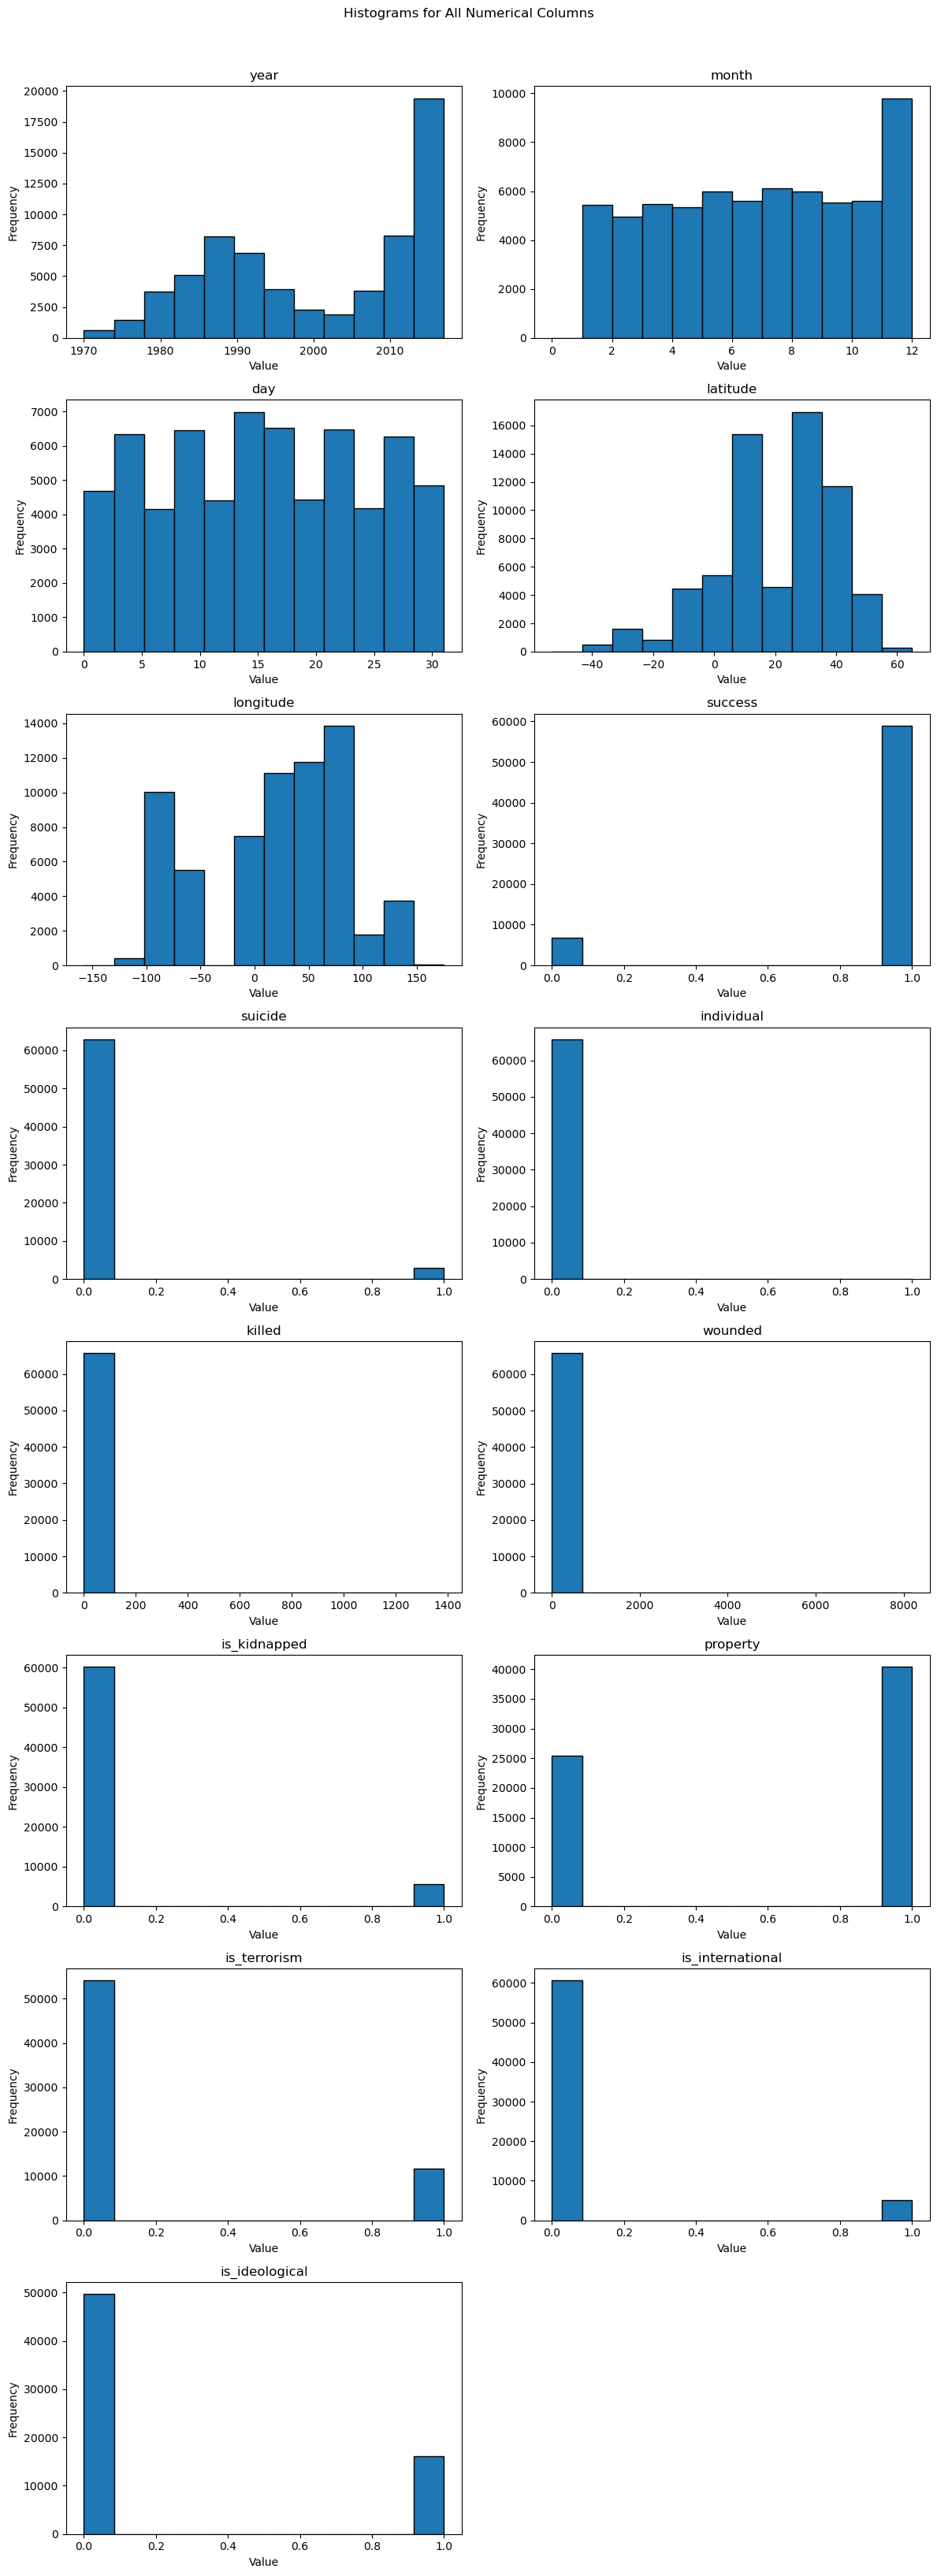

In [124]:
num_columns = df_cleaned.select_dtypes(include=['number']).columns

print("Numerical columns:", num_columns)

num_plots = len(num_columns)
rows = (num_plots // 2) + (num_plots % 2)

plt.figure(figsize=(12, rows * 4))  
for i, column in enumerate(num_columns, 1):
    plt.subplot(rows, 2, i)  
    plt.hist(df_cleaned[column].dropna(), bins=12, edgecolor='black')  
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms for All Numerical Columns', y=1.02)
plt.show()

#### Result: I can see that:
            Terrorist increased after 2010
            Most of terrorist was at thr end of the year
            Most of terrorist was succeeded
            Most of terrorist was not suicided
            Most of terrorist was not individual
            Number of killed people below 200
            Number of wounded people below 1000
            In Most of terrorist was no kidnapped events

## Use Dask to handle large data eSiciently and compare the performance with Pandas for certain operations.

In [126]:
import time
import dask.dataframe as dd

file_path = "F:/ITI Data Egineering/Liberaries/final project/globalterrorismdb_0718dist.csv"

# The time it takes to read the dataset with Pandas
start_time = time.time()
df_pandas = pd.read_csv(file_path, encoding="ISO-8859-1")
pandas_read_time = time.time() - start_time
print(f"Pandas read time: {pandas_read_time} seconds")

# The time it takes to read the dataset with Dask
dtype_dict = {
    'approxdate': 'object',
    'attacktype2_txt': 'object',
    'attacktype3_txt': 'object',
    'claimmode2_txt': 'object',
    'claimmode3_txt': 'object',
    'corp2': 'object',
    'corp3': 'object',
    'divert': 'object',
    'doubtterr': 'float64',
    'gname2': 'object',
    'gname3': 'object',
    'gsubname': 'object',
    'gsubname2': 'object',
    'gsubname3': 'object',
    'hostkidoutcome_txt': 'object',
    'multiple': 'float64',
    'natlty1': 'float64',
    'natlty2_txt': 'object',
    'natlty3_txt': 'object',
    'ransom': 'float64',
    'ransomnote': 'object',
    'related': 'object',
    'target2': 'object',
    'target3': 'object',
    'targsubtype1': 'float64',
    'targsubtype2_txt': 'object',
    'targsubtype3_txt': 'object',
    'targtype2_txt': 'object',
    'targtype3_txt': 'object',
    'weapsubtype2_txt': 'object',
    'weapsubtype3_txt': 'object',
    'weaptype2_txt': 'object',
    'weaptype3_txt': 'object',
    'guncertain1': 'float64',
       'ishostkid': 'float64',
       'resolution': 'object',
       'specificity': 'float64',
       'weapsubtype4_txt': 'object',
       'weaptype4_txt': 'object'
}
start_time = time.time()
df_dask = dd.read_csv(file_path, dtype=dtype_dict, encoding="ISO-8859-1")
dask_read_time = time.time() - start_time
print(f"Dask read time: {dask_read_time} seconds")

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\1005602095.py:8: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pandas = pd.read_csv(file_path, encoding="ISO-8859-1")


Pandas read time: 3.8629958629608154 seconds
Dask read time: 0.4367194175720215 seconds


In [128]:
# Perform some operations and measure the time taken by Pandas
# Group by 'country' and count the number of attacks
start_time = time.time()
pandas_grouped = df_pandas.groupby('country').size().reset_index(name='count')
pandas_group_time = time.time() - start_time
print(f"Pandas group by time: {pandas_group_time} seconds")

# With Dask
start_time = time.time()
dask_grouped = df_dask.groupby('country').size().compute()
dask_group_time = time.time() - start_time
print(f"Dask group by time: {dask_group_time} seconds")


Pandas group by time: 0.060648441314697266 seconds
Dask group by time: 4.317276239395142 seconds


In [130]:
# Check for duplicates
# With pandas
start_time = time.time()
pandas_duplicated = df_pandas[df_pandas.duplicated()]
pandas_duplicated_time = time.time() - start_time
print(f"Pandas duplicated time: {pandas_duplicated_time} seconds")

# With dask
# start_time = time.time()
# dask_duplicated = df_dask[df_dask.duplicated()].compute()
# dask_duplicated_time = time.time() - start_time
# print(f"Dask duplicated time: {dask_duplicated_time} seconds")
# tha above code gives me an error 'DataFrame' object has no attribute 'duplicated'

# Define a function to identify duplicates
def find_duplicates(df):
    duplicated_mask = df.duplicated(keep=False)
    return df[duplicated_mask]
#with Dask
start_time = time.time()
dask_duplicated = df_dask.map_partitions(find_duplicates).compute()
dask_duplicated_time = time.time() - start_time
print(f"Dask duplicated time: {dask_duplicated_time} seconds")

Pandas duplicated time: 1.1060364246368408 seconds


G:\anaconda\Lib\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


Dask duplicated time: 6.280951499938965 seconds


# Save the DataFrame to a CSV file

In [132]:
# Save the DataFrame to a CSV file
df_cleaned.to_csv('Global_terrorism.csv', index=False)

# Data Analysis

In [134]:
df_cleaned.head(1)

,year,month,day,country,region,city,latitude,longitude,success,suicide,attack_type,target_type,group_name,individual,weapon_type,killed,wounded,is_kidnapped,property,is_terrorism,state,source,is_international,is_ideological,nationality
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,Unknown,0.0,0.0,1.0,0.0,0.0,Federal,PGIS,0.0,1.0,Belgium


## Statistical analysis using Numpy

In [136]:
#Basic statistics for numeric columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
statistics = df_cleaned[numeric_cols].agg(['mean', 'median', 'std']).T

print("Basic Statistics for Numeric Columns:")
print(statistics)


Basic Statistics for Numeric Columns:
                         mean       median        std
year              2000.581830  2003.000000  13.685009
month                6.465914     7.000000   3.362502
day                 15.535652    15.000000   8.733909
latitude            20.834013    25.594176  19.942203
longitude           18.334306    35.198219  63.520153
success              0.896366     1.000000   0.304788
suicide              0.044369     0.000000   0.205915
individual           0.000243     0.000000   0.015593
killed               2.845141     0.000000  13.702052
wounded              3.661798     0.000000  55.222021
is_kidnapped         0.085303     0.000000   0.279334
property             0.614252     1.000000   0.486775
is_terrorism         0.177765     0.000000   0.382318
is_international     0.078402     0.000000   0.268805
is_ideological       0.244783     0.000000   0.429961


In [138]:
#Mode for Numeric Columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
mode_df = df_cleaned[numeric_cols].mode().iloc[0]
mode_df.index = [f'mode_{col}' for col in mode_df.index]

print("Mode for Numeric Columns:")
print(mode_df)

Mode for Numeric Columns:
mode_year                2015.000000
mode_month                  7.000000
mode_day                   15.000000
mode_latitude             -11.967368
mode_longitude            -76.978462
mode_success                1.000000
mode_suicide                0.000000
mode_individual             0.000000
mode_killed                 0.000000
mode_wounded                0.000000
mode_is_kidnapped           0.000000
mode_property               1.000000
mode_is_terrorism           0.000000
mode_is_international       0.000000
mode_is_ideological         0.000000
Name: 0, dtype: float64


In [140]:
df_cleaned.describe()

,year,month,day,latitude,longitude,success,suicide,individual,killed,wounded,is_kidnapped,property,is_terrorism,is_international,is_ideological
count,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000,65789.000000
mean,2000.581830,6.465914,15.535652,20.834013,18.334306,0.896366,0.044369,0.000243,2.845141,3.661798,0.085303,0.614252,0.177765,0.078402,0.244783
std,13.685009,3.362502,8.733909,19.942203,63.520153,0.304788,0.205915,0.015593,13.702052,55.222021,0.279334,0.486775,0.382318,0.268805,0.429961
min,1970.000000,0.000000,0.000000,-53.154613,-157.858333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1988.000000,4.000000,8.000000,7.219156,-7.312045,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2003.000000,7.000000,15.000000,25.594176,35.198219,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,35.120201,67.755000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,64.837778,175.070783,1.000000,1.000000,1.000000,1384.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
# Identify the most frequent values in categorical columns
categorical_cols = df_cleaned.select_dtypes(include=[object]).columns
most_frequent_values = df_cleaned[categorical_cols].mode().iloc[0]

print("Most Frequent Values in Categorical Columns:")
print(most_frequent_values)

Most Frequent Values in Categorical Columns:
country                        Afghanistan
region                          South Asia
city                               Unknown
attack_type              Bombing/Explosion
target_type    Private Citizens & Property
group_name                         Taliban
weapon_type                     Explosives
state                     Northern Ireland
source                                PGIS
nationality                    Afghanistan
Name: 0, dtype: object


## Using Pandas

### Group data by various categories (e.g., year, region, attack type) and calculate aggregate statistics.

In [148]:
# Group data by year and calculate the number of attacks per year
attacks_per_year = df_cleaned.groupby('year')['attack_type'].count().reset_index(name='num_attacks').sort_values(by='num_attacks', ascending=False)
attacks_per_year

,year,num_attacks
44,2015,5408
45,2016,4928
43,2014,4793
46,2017,4286
42,2013,2907
41,2012,2753
19,1989,2589
21,1991,2573
18,1988,2327
22,1992,2222


In [150]:
# Group data by region and calculate the number of attacks per region
attacks_per_region = df_cleaned.groupby('region')['attack_type'].count().reset_index(name='num_attacks').sort_values(by='num_attacks', ascending=False)
attacks_per_region

,region,num_attacks
8,South Asia,15631
5,Middle East & North Africa,13635
7,South America,10637
11,Western Europe,8022
10,Sub-Saharan Africa,6704
9,Southeast Asia,4445
1,Central America & Caribbean,3981
6,North America,1382
4,Eastern Europe,1013
3,East Asia,214


In [152]:
# Group data by country and calculate the number of attacks per country
attacks_per_country = df_cleaned.groupby('country')['attack_type'].count().reset_index(name='num_attacks').sort_values(by='num_attacks', ascending=False)
attacks_per_country

,country,num_attacks
0,Afghanistan,5804
28,Colombia,4571
61,India,4307
114,Peru,4294
65,Iraq,4014
115,Philippines,3536
109,Pakistan,2779
41,El Salvador,2534
151,Turkey,2390
156,United Kingdom,2330


In [154]:
# Group data by country and calculate the number of attacks per attack_type
attacks_per_type = df_cleaned.groupby('attack_type').size().reset_index(name='num_attacks').sort_values(by='num_attacks', ascending=False)
attacks_per_type

,attack_type,num_attacks
2,Bombing/Explosion,29219
0,Armed Assault,16706
1,Assassination,6829
6,Hostage Taking (Kidnapping),4349
3,Facility/Infrastructure Attack,4207
8,Unknown,3276
5,Hostage Taking (Barricade Incident),621
7,Unarmed Assault,339
4,Hijacking,243


In [156]:
# Group data by target type and calculate the number of each type of target
attacks_per_target = df_cleaned.groupby('target_type')['attack_type'].count().reset_index(name='num_attacks').sort_values(by='num_attacks', ascending=False)
attacks_per_target

,target_type,num_attacks
13,Private Citizens & Property,13220
9,Military,12260
12,Police,9784
2,Business,8387
6,Government (General),7099
20,Utilities,3020
18,Transportation,2703
5,Government (Diplomatic),1346
3,Educational Institution,1285
14,Religious Figures/Institutions,1213


### Identify trends over time (e.g., number of attacks per year)

In [158]:
# Identify trends over time
trends_over_time = df_cleaned.groupby(['year', 'region'])['attack_type'].count().unstack().fillna(0)
print("Trends over time (number of attacks per year per region):")
trends_over_time.head()

Trends over time (number of attacks per year per region):


region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1.0,4.0,0.0,0.0,3.0,16.0,111.0,51.0,0.0,3.0,0.0,17.0
1971,0.0,2.0,0.0,0.0,0.0,20.0,107.0,15.0,0.0,0.0,1.0,16.0
1972,1.0,0.0,0.0,0.0,0.0,27.0,48.0,14.0,1.0,6.0,4.0,53.0
1973,0.0,2.0,0.0,0.0,1.0,11.0,38.0,33.0,1.0,0.0,2.0,49.0
1974,0.0,6.0,0.0,2.0,1.0,24.0,42.0,49.0,0.0,1.0,2.0,97.0


In [160]:
trends_over_time.tail()

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
2013,1.0,0.0,0.0,3.0,9.0,641.0,6.0,132.0,1270.0,320.0,435.0,90.0
2014,4.0,2.0,2.0,14.0,271.0,1535.0,2.0,226.0,1437.0,382.0,856.0,62.0
2015,0.0,0.0,0.0,7.0,186.0,2014.0,12.0,133.0,1704.0,540.0,736.0,76.0
2016,0.0,1.0,4.0,2.0,29.0,2127.0,1.0,118.0,1395.0,359.0,839.0,53.0
2017,1.0,0.0,0.0,1.0,28.0,1384.0,5.0,101.0,1348.0,547.0,809.0,62.0


### Determine the most affected regions and countries

In [162]:
# Determine the most affected regions
most_affected_regions = attacks_per_region.sort_values(by='num_attacks', ascending=False).head(10)
print("Most affected regions:")
most_affected_regions

Most affected regions:


,region,num_attacks
8,South Asia,15631
5,Middle East & North Africa,13635
7,South America,10637
11,Western Europe,8022
10,Sub-Saharan Africa,6704
9,Southeast Asia,4445
1,Central America & Caribbean,3981
6,North America,1382
4,Eastern Europe,1013
3,East Asia,214


In [164]:
# Determine the most affected countries
most_affected_country = attacks_per_country.sort_values(by='num_attacks', ascending=False).head(10)
print("Most affected country:")
most_affected_country

Most affected country:


,country,num_attacks
0,Afghanistan,5804
28,Colombia,4571
61,India,4307
114,Peru,4294
65,Iraq,4014
115,Philippines,3536
109,Pakistan,2779
41,El Salvador,2534
151,Turkey,2390
156,United Kingdom,2330


In [166]:
attacks_per_city = df_cleaned.groupby('city')['attack_type'].count().reset_index(name='num_attacks')
attacks_per_city
# Determine the most affected cities
most_affected_city = attacks_per_city.sort_values(by='num_attacks', ascending=False).head(10)
print("Most affected cityy:")
most_affected_city

Most affected cityy:


,city,num_attacks
16720,Unknown,3261
9498,Lima,1645
2166,Belfast,938
14368,San Salvador,784
14508,Santiago,783
10977,Mogadishu,655
1462,Baghdad,645
11138,Mosul,499
1211,Athens,472
7108,Istanbul,441


### Identify the most common attack types and targets

In [168]:
# Identify the most common attack types
most_common_attack_types = attacks_per_type.sort_values(by='num_attacks', ascending=False).head(10)
print("Most common attack types:")
most_common_attack_types

Most common attack types:


,attack_type,num_attacks
2,Bombing/Explosion,29219
0,Armed Assault,16706
1,Assassination,6829
6,Hostage Taking (Kidnapping),4349
3,Facility/Infrastructure Attack,4207
8,Unknown,3276
5,Hostage Taking (Barricade Incident),621
7,Unarmed Assault,339
4,Hijacking,243


In [170]:
# Identify the most common targets
most_common_targets = attacks_per_target.sort_values(by='num_attacks', ascending=False).head(10)
print("Most common targets:")
most_common_targets

Most common targets:


,target_type,num_attacks
13,Private Citizens & Property,13220
9,Military,12260
12,Police,9784
2,Business,8387
6,Government (General),7099
20,Utilities,3020
18,Transportation,2703
5,Government (Diplomatic),1346
3,Educational Institution,1285
14,Religious Figures/Institutions,1213


# Data Visualization

## Use Matplotlib and Seaborn to create visualizations

### Line plot showing the trend of terrorist attacks over the years.

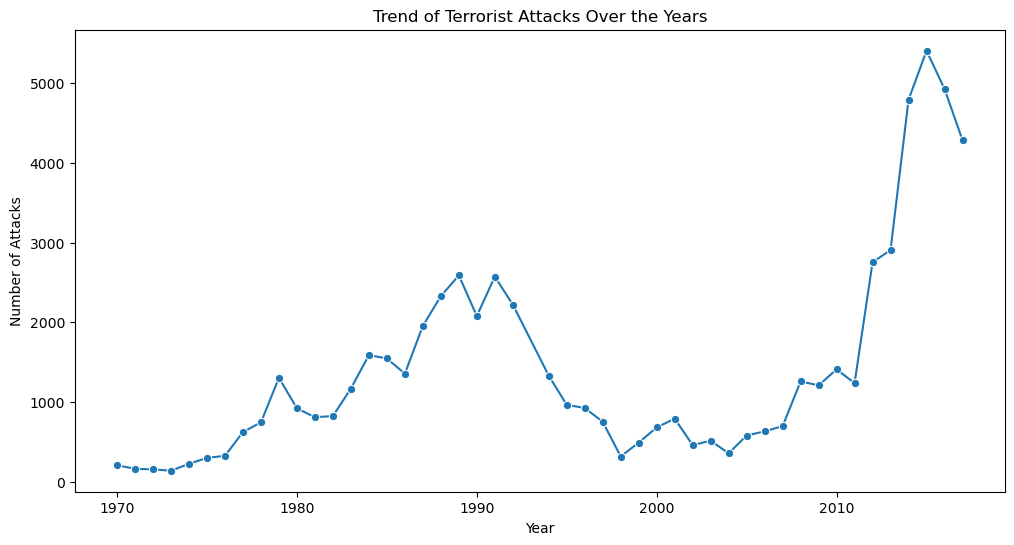

In [172]:
attacks_per_year = df_cleaned.groupby('year')['attack_type'].count().reset_index(name='num_attacks')#.sort_values(by='num_attacks', ascending=False)
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='num_attacks', data=attacks_per_year, marker='o')
plt.title('Trend of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

#### Result: the line plot shows that the terrorist attacks increased after 2010

### Bar plot of the number of attacks by region

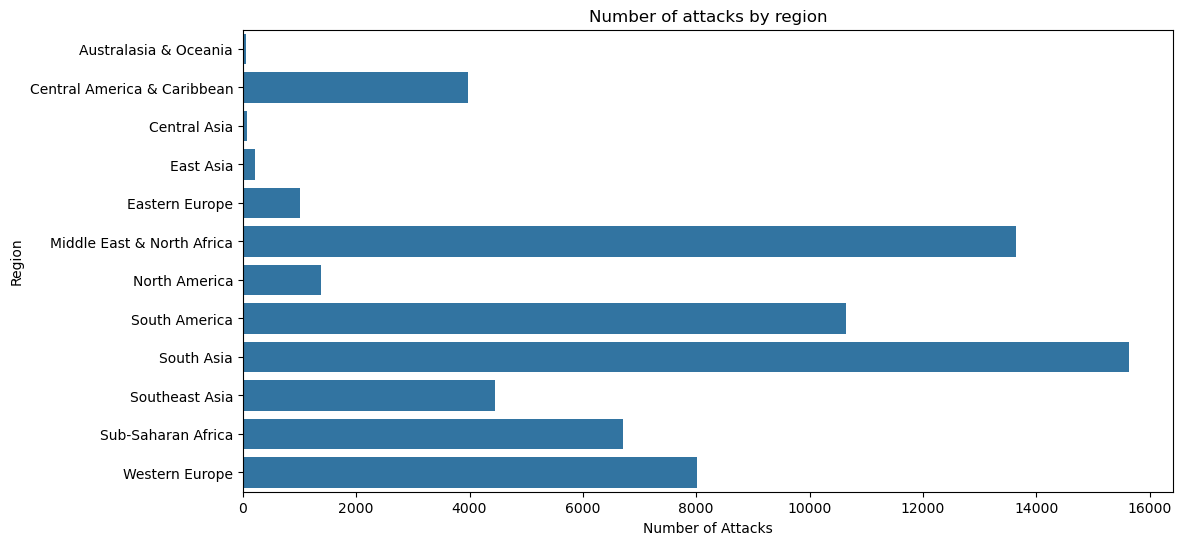

In [174]:
attacks_per_region = df_cleaned.groupby('region')['attack_type'].count().reset_index(name='num_attacks')
plt.figure(figsize=(12, 6))
sns.barplot(y='region', x='num_attacks', data=attacks_per_region)
plt.title('Number of attacks by region')
plt.ylabel('Region')
plt.xlabel('Number of Attacks')
plt.show()

#### Result: the bar plot shows that the terrorist attacks are high in South Asia then in Middle East & North Africa

### Bar plot of the number of attacks by country

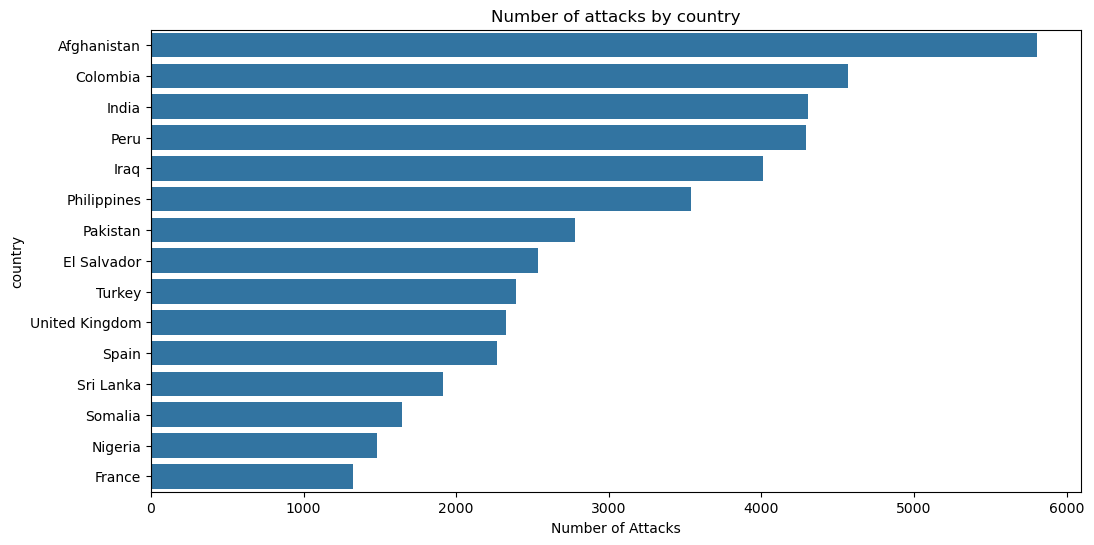

In [176]:
attacks_per_country = df_cleaned.groupby('country')['attack_type'].count().reset_index(name='num_attacks').sort_values(by='num_attacks', ascending= False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(y='country', x='num_attacks', data=attacks_per_country)
plt.title('Number of attacks by country')
plt.ylabel('country')
plt.xlabel('Number of Attacks')
plt.show()


#### Result: the bar plot shows that the terrorist attacks are the highest in Afghanstan

In [178]:
df_cleaned.head(1)

,year,month,day,country,region,city,latitude,longitude,success,suicide,attack_type,target_type,group_name,individual,weapon_type,killed,wounded,is_kidnapped,property,is_terrorism,state,source,is_international,is_ideological,nationality
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,Unknown,0.0,0.0,1.0,0.0,0.0,Federal,PGIS,0.0,1.0,Belgium


### Heatmap to visualize the correlation between different features

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\2402243533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['killed'].fillna(0, inplace=True)
C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\2402243533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['killed'].fillna(0, inplace=True)
C:\Users\WORK UEFI\Ap

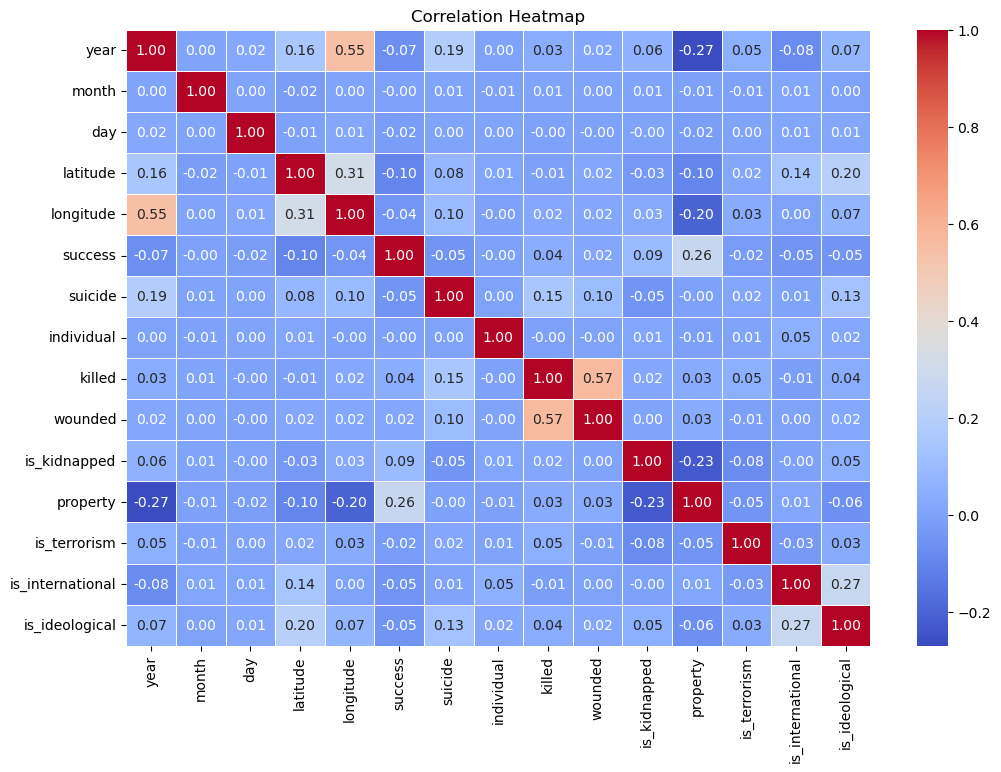

In [180]:
df_cleaned['killed'].fillna(0, inplace=True)
df_cleaned['killed'] = df_cleaned['killed'].astype(int)
numeric_cols = [
    'year', 'month', 'day', 'latitude', 'longitude',
    'success', 'suicide', 'individual', 'killed',
    'wounded', 'is_kidnapped', 'property',
    'is_terrorism', 'is_international', 'is_ideological'
]
correlation_matrix = df_cleaned[numeric_cols].corr().dropna()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Reslut: I can't see any strong correlation

In [182]:
df_cleaned.dtypes

year                  int64
month                 int64
day                   int64
country              object
region               object
city                 object
latitude            float64
longitude           float64
success               int64
suicide               int64
attack_type          object
target_type          object
group_name           object
individual            int64
weapon_type          object
killed                int32
wounded             float64
is_kidnapped        float64
property            float64
is_terrorism        float64
state                object
source               object
is_international    float64
is_ideological      float64
nationality          object
dtype: object

### Scatter plot showing the relationship between the number of casualties and the type of attack

In [184]:
# adding the casualties column
# casualties is total number of people killed or injured in an attack
df_cleaned['casualties'] = df_cleaned['killed'] + df_cleaned['wounded']

C:\Users\WORK UEFI\AppData\Local\Temp\ipykernel_12216\3754365071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['casualties'] = df_cleaned['killed'] + df_cleaned['wounded']


In [186]:
# Make sure that it was created
df_cleaned.head(1)

,year,month,day,country,region,city,latitude,longitude,success,suicide,attack_type,target_type,group_name,individual,weapon_type,killed,wounded,is_kidnapped,property,is_terrorism,state,source,is_international,is_ideological,nationality,casualties
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,Unknown,0,0.0,1.0,0.0,0.0,Federal,PGIS,0.0,1.0,Belgium,0.0


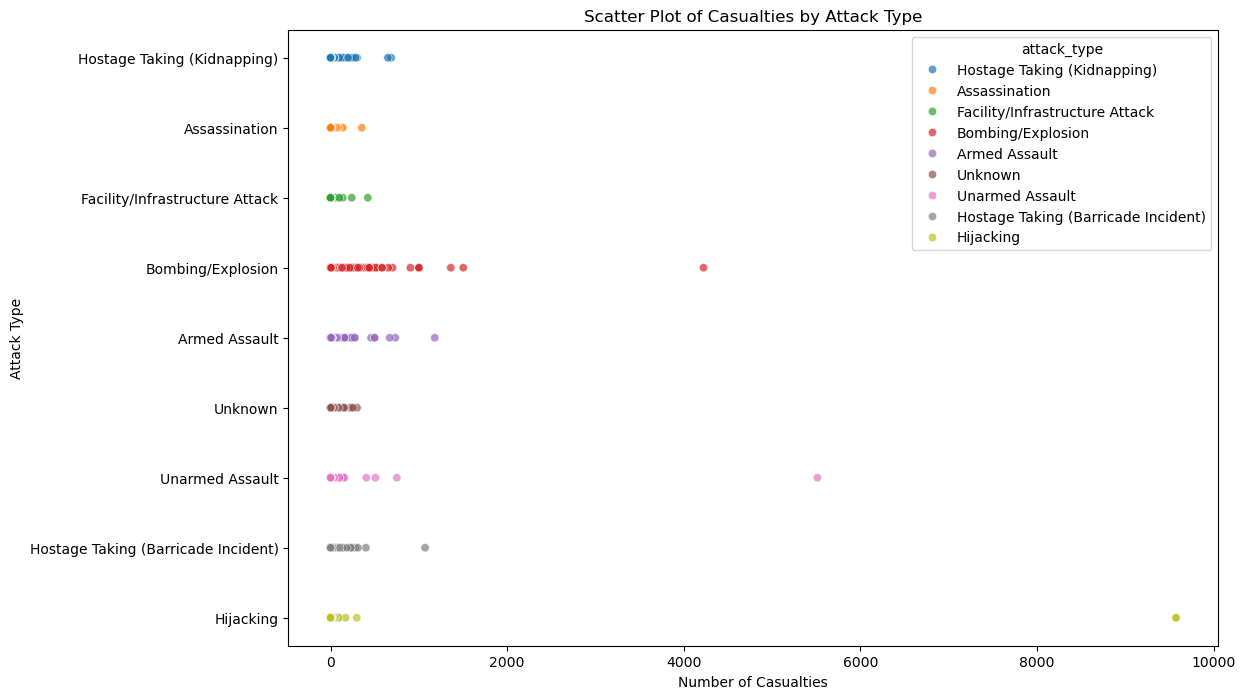

In [188]:
#scatter plot between the number of casualties and the type of attack
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, y='attack_type', x='casualties', hue='attack_type', palette='tab10', alpha=0.7)
#plt.xticks(rotation=90) 
plt.ylabel('Attack Type')
plt.xlabel('Number of Casualties')
plt.title('Scatter Plot of Casualties by Attack Type')
plt.show()


#### Result: Scatter plot shows that Bombing/Explosive has a high number of casualties

# Performance Comparison with Dask

In [190]:
# Create a large dataset
n_rows = 1_000_000
data = {
    'col1': np.random.rand(n_rows),
    'col2': np.random.randint(0, 100, size=n_rows),
    'col3': np.random.choice(['A', 'B', 'C', 'D'], size=n_rows),
    'col4': np.random.choice(['X', 'Y', 'Z'], size=n_rows)
}
df = pd.DataFrame(data)

In [192]:
df.shape

(1000000, 4)

In [194]:
start_time = time.time()
result = df.groupby("col1").sum()
end_time = time.time()

print(f"pandas time: {end_time - start_time} seconds")

mem_usage_pandas = memory_profiler.memory_usage()[0]
print(f"Pandas memory usage: {mem_usage_pandas} MB")

pandas time: 1.063988208770752 seconds
Pandas memory usage: 887.7734375 MB


In [196]:
df = dd.from_pandas(df, npartitions=10)

In [198]:
%%time
result = df.groupby("col1").sum()
computed_result = result.compute()
mem_usage_dask = memory_profiler.memory_usage()[0]
print(f"Dask memory usage: {mem_usage_dask} MB")

Dask memory usage: 883.85546875 MB
CPU times: total: 2.62 s
Wall time: 1.98 s


#### Result:
#### Pandas time: 3.0992870330810547 seconds
#### Pandas memory usage: 229.46484375 MB
#### Dask time: 2.7 s
#### Dask memory usage: 255.7734375 MB
#### the result changed because i ran the not several time